In [1]:
!pip install torchview

import time
import os

from copy import deepcopy

import torch
import torchvision
import torch.nn as nn
import graphviz
import torchview

from matplotlib import pyplot as plt

# Загрузка данных

In [2]:
mean, std = [0.49140, 0.48216, 0.44653], [0.24703, 0.24349, 0.26159]

In [3]:
def get_data_loaders(transform):
    train_dataset = torchvision.datasets.CIFAR10(root=os.getcwd(), train=True, download=True, transform=transform)
    test_dataset = torchvision.datasets.CIFAR10(root=os.getcwd(), train=False, download=True, transform = transform)

    train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

    return train_data_loader, test_data_loader

In [4]:
train_data_loader_resnet, test_data_loader_resnet = get_data_loaders(torchvision.models.ResNet18_Weights.DEFAULT.transforms())

100%|██████████| 170498071/170498071 [00:03<00:00, 42910142.62it/s]


Extracting /content/cifar-10-python.tar.gz to /content
Files already downloaded and verified


In [5]:
train_data_loader_densenet, test_data_loader_densenet = get_data_loaders(torchvision.models.DenseNet121_Weights.DEFAULT.transforms())

Files already downloaded and verified
Files already downloaded and verified


In [6]:
train_data_loader_gnet, test_data_loader_gnet = get_data_loaders(torchvision.models.GoogLeNet_Weights.DEFAULT.transforms())

Files already downloaded and verified
Files already downloaded and verified


In [7]:
train_data_loader_regnet, test_data_loader_regnet = get_data_loaders(torchvision.models.RegNet_Y_800MF_Weights.DEFAULT.transforms())

Files already downloaded and verified
Files already downloaded and verified


# Построение архитектуры свёрточной сети

In [8]:
learning_rate, num_epochs = 0.001, 5
loss_function = nn.CrossEntropyLoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
loss_function = torch.nn.CrossEntropyLoss()
print(device, learning_rate, num_epochs)

cuda:0 0.001 5


In [9]:
def layer_var1(features):
    return torch.nn.Linear(features, 10)

def layer_var2(features):
    return torch.nn.Sequential(torch.nn.Linear(features, features // 2), torch.nn.ReLU(), torch.nn.Linear(features // 2, 10))

def get_modified_model(model, layer):
    model = deepcopy(model)
    model.fc = layer
    return model

## ResNet18

In [10]:
resnet18 = torchvision.models.resnet18(torchvision.models.ResNet18_Weights.DEFAULT)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 74.3MB/s]


In [11]:
resnet18_var1 = get_modified_model(resnet18, layer_var1(resnet18.fc.in_features))
resnet18_var1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
resnet18_var2 = get_modified_model(resnet18, layer_var2(resnet18.fc.in_features))
resnet18_var2

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## DenseNet121

In [13]:
densenet121 = torchvision.models.densenet121(torchvision.models.DenseNet121_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 60.3MB/s]


In [14]:
def get_modified_desnet(model, layer):
    model = deepcopy(model)
    for i in model.parameters():
        i.requires_grad = False
    model.classifier = layer
    return model

In [15]:
densenet121_var1 = get_modified_desnet(densenet121, layer_var1(densenet121.classifier.in_features))
densenet121_var1

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [16]:
densenet121_var2 = get_modified_desnet(densenet121, layer_var2(densenet121.classifier.in_features))
densenet121_var2

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

## GoogleNet

In [17]:
gnet = torchvision.models.googlenet(torchvision.models.GoogLeNet_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 32.4MB/s]


In [18]:
gnet_var1 = get_modified_model(gnet, layer_var1(gnet.fc.in_features))
gnet_var1

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [19]:
gnet_var2 = get_modified_model(gnet, layer_var2(gnet.fc.in_features))
gnet_var2

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

## RegNet

In [20]:
regnet = torchvision.models.regnet_y_800mf(torchvision.models.RegNet_Y_800MF_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/regnet_y_800mf-58fc7688.pth" to /root/.cache/torch/hub/checkpoints/regnet_y_800mf-58fc7688.pth
100%|██████████| 24.8M/24.8M [00:00<00:00, 47.5MB/s]


In [21]:
regnet_var1 = get_modified_model(regnet, layer_var1(regnet.fc.in_features))
regnet_var1

RegNet(
  (stem): SimpleStemIN(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (trunk_output): Sequential(
    (block1): AnyStage(
      (block1-0): ResBottleneckBlock(
        (proj): Conv2dNormActivation(
          (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (f): BottleneckTransform(
          (a): Conv2dNormActivation(
            (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (b): Conv2dNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=4, bias=False)
            

In [22]:
regnet_var2 = get_modified_model(regnet, layer_var2(regnet.fc.in_features))
regnet_var2

RegNet(
  (stem): SimpleStemIN(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (trunk_output): Sequential(
    (block1): AnyStage(
      (block1-0): ResBottleneckBlock(
        (proj): Conv2dNormActivation(
          (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (f): BottleneckTransform(
          (a): Conv2dNormActivation(
            (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (b): Conv2dNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=4, bias=False)
            

## Обучение и тестирование модели

In [23]:
def get_accuracy(model, data_loader, device):
    tp, n = 0, 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels.to(device)
            images = images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            n += labels.size(0)
            tp += (predicted == labels).sum()
    return tp / n

def get_loss(model, data_loader, device):
    loss, n = 0, 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels = labels.to(device)
            images = images.to(device)
            outputs = model(images)
            loss += loss_function(outputs, labels)
            n += labels.size(0)
    return loss / n

def accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    return torch.tensor(torch.sum(predicted == labels).item() / len(predicted))

def train(model, data_loader, epochs, loss_function, optimizer, device):
    print('обучение началось')
    start = time.time()
    for epoch in range(epochs):
        t1 = time.time()
        accs, lss = [], []
        for i, (images, labels) in enumerate(data_loader):
            labels = labels.to(device)
            images = images.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = loss_function(outputs, labels)
            acc = accuracy(outputs, labels)
            lss.append(loss)
            accs.append(acc)
            loss.backward()
            optimizer.step()
        t2 = time.time()
        print(f'Эпоха {epoch + 1}: потеря = {torch.stack(lss).mean()}, точность = {torch.stack(accs).mean()}, время = {t2 - t1}')
    end = time.time()
    print('общее время обучения {}'.format(end - start))

In [24]:
accuracies_by_net = {
    'resnet18_var1': None,
    'resnet18_var2': None,
    'densenet121_var1': None,
    'densenet121_var2': None,
    'gnet_var1': None,
    'gnet_var2': None,
    'regnet_var1': None,
    'regnet_var2': None
}
torch.cuda.empty_cache()

In [25]:
for net in accuracies_by_net:
  eval(net).to(device)
  print(f'\nСеть {net}')
  train(eval(net), eval(f'train_data_loader_{net[:net.find("net") + 3]}'), num_epochs, loss_function, torch.optim.Adam(eval(net).parameters(), lr=learning_rate), device)
  acc = get_accuracy(eval(net), eval(f'test_data_loader_{net[:net.find("net") + 3]}'), device)
  print(f'точность на тестовой выборке: {acc}')
  accuracies_by_net[net] = acc
  torch.cuda.empty_cache()


Сеть resnet18_var1
обучение началось
Эпоха 1: потеря = 0.510285496711731, точность = 0.8246403932571411, время = 182.4300675392151
Эпоха 2: потеря = 0.27879422903060913, точность = 0.905286967754364, время = 174.3770191669464
Эпоха 3: потеря = 0.18443678319454193, точность = 0.9361252784729004, время = 176.74798011779785
Эпоха 4: потеря = 0.1245424672961235, точность = 0.9562579989433289, время = 176.5745210647583
Эпоха 5: потеря = 0.10501036047935486, точность = 0.9632992148399353, время = 175.37438106536865
общее время обучения 886.2162251472473
точность на тестовой выборке: 0.8998000025749207

Сеть resnet18_var2
обучение началось
Эпоха 1: потеря = 0.549066960811615, точность = 0.814406156539917, время = 176.43137860298157
Эпоха 2: потеря = 0.2976325452327728, точность = 0.8984854221343994, время = 176.81733632087708
Эпоха 3: потеря = 0.21355393528938293, точность = 0.9275255799293518, время = 176.76051592826843
Эпоха 4: потеря = 0.1506832093000412, точность = 0.9484015703201294, вр

## Представление результатов

In [39]:
accuracy_by_net = {k: float(str(v)[v.find('(') + 1: v.find(',')]) for k, v in accuracies_by_net.items()}
accuracy_by_net

{'resnet18_var1': 0.8998,
 'resnet18_var2': 0.9024,
 'densenet121_var1': 0.7961,
 'densenet121_var2': 0.8038,
 'gnet_var1': 0.9148,
 'gnet_var2': 0.9043,
 'regnet_var1': 0.9332,
 'regnet_var2': 0.9299}

In [40]:
accuracy_by_net['resnet_pr1'] = 0.8755
accuracy_by_net

{'resnet18_var1': 0.8998,
 'resnet18_var2': 0.9024,
 'densenet121_var1': 0.7961,
 'densenet121_var2': 0.8038,
 'gnet_var1': 0.9148,
 'gnet_var2': 0.9043,
 'regnet_var1': 0.9332,
 'regnet_var2': 0.9299,
 'resnet_pr1': 0.8755}

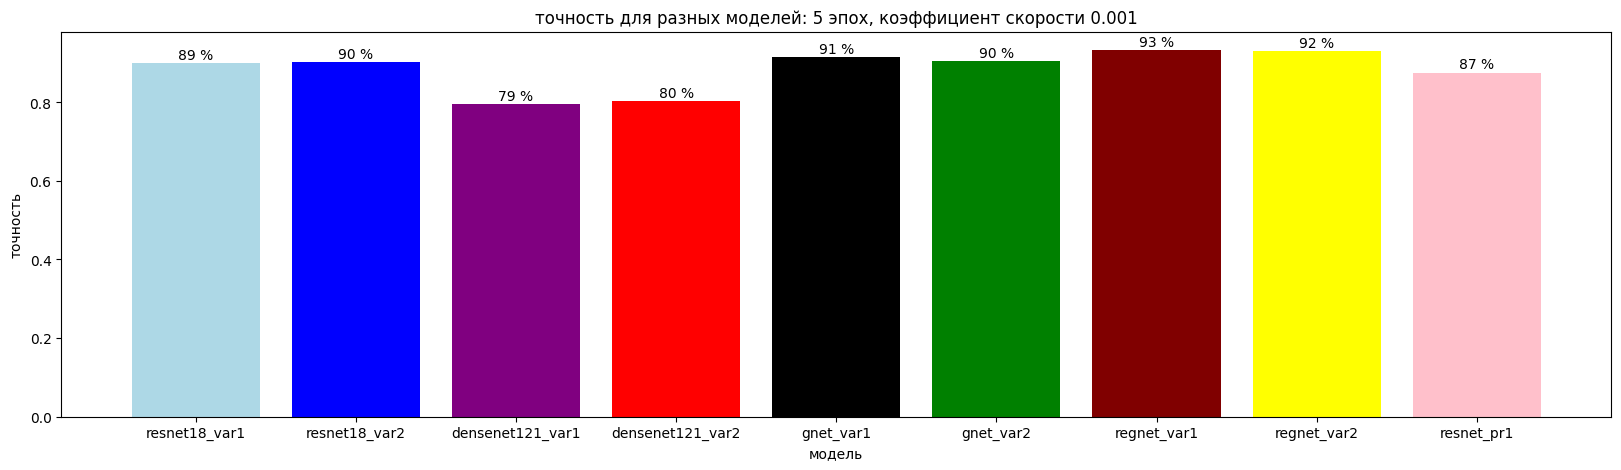

In [68]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.01, f'{int(y[i] * 100)} %', ha='center')

plt.figure(figsize=(20, 5))
color = ['lightblue', 'blue', 'purple', 'red', 'black', 'green', 'maroon', 'yellow', 'pink']
plt.bar(accuracy_by_net.keys(), accuracy_by_net.values(), width=0.8, color=color)
plt.title(f'точность для разных моделей: {num_epochs} эпох, коэффициент скорости {learning_rate}')
plt.xlabel('модель')
plt.ylabel('точность')
add_labels(list(accuracy_by_net.keys()), list(accuracy_by_net.values()))
plt.show()

Луший разультат получен на модифицированной архитектуре RegNet в первой вариации (Linear на последнем слое).